In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
x = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cars_multiple_linearR.csv')

In [ ]:
x

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [7]:
x.loc[0:17]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [9]:
x['Price'].mean()

19418.746935058713

In [10]:
x['Mileage'].mean()

161.2372842347526

In [11]:
x['Year'].mean()

2006.5500575373992

In [12]:
x['EngineV'].mean()

2.79073420738975

In [13]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,4173.0,19418.746935,25584.242620,600.0,6999.0,11500.0,21700.0,300000.00
Mileage,4345.0,161.237284,105.705797,0.0,86.0,155.0,230.0,980.00
EngineV,4195.0,2.790734,5.066437,0.6,1.8,2.2,3.0,99.99
Year,4345.0,2006.550058,6.719097,1969.0,2003.0,2008.0,2012.0,2016.00


In [14]:
x["Year"].unique()

array([1991, 1999, 2003, 2007, 2011, 2016, 1997, 2006, 2012, 1994, 2008,
       2001, 2013, 1998, 2010, 1989, 2009, 1996, 2014, 2000, 2004, 1987,
       1990, 2005, 1995, 2002, 2015, 1992, 1988, 1986, 1980, 1979, 1985,
       1993, 1969, 1984, 1978, 1983, 1982])

In [15]:
x["EngineV"].fillna(value=x["EngineV"].mean(),inplace=True)

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4345 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [17]:
x['Body'].duplicated().unique()

array([False,  True])

In [18]:
x.dropna(axis=1)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,sedan,277,2.000000,Petrol,yes,1991,320
1,Mercedes-Benz,van,427,2.900000,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,sedan,358,5.000000,Gas,yes,2003,S 500
3,Audi,crossover,240,4.200000,Petrol,yes,2007,Q7
4,Toyota,crossover,120,2.000000,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,sedan,9,3.000000,Diesel,yes,2014,S 350
4341,BMW,sedan,1,3.500000,Petrol,yes,1999,535
4342,BMW,sedan,194,2.000000,Petrol,yes,1985,520
4343,Toyota,sedan,31,2.790734,Petrol,yes,2014,Corolla


In [19]:
x.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4345.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,4.978196,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.900000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [20]:
features_data = pd.DataFrame(index=x.columns)


In [22]:

train_corr= x.corr()

<ipython-input-22-563e3fc54064>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr= x.corr()


In [23]:
train_corr

,Price,Mileage,EngineV,Year
Price,1.000000,-0.464795,0.058108,0.487031
Mileage,-0.464795,1.000000,0.020327,-0.668635
EngineV,0.058108,0.020327,1.000000,-0.022498
Year,0.487031,-0.668635,-0.022498,1.000000


Price has the highest correlation with Year
Price also has somewhat correlation with Engine
Price has no correlation with mileage

In [24]:
features_data['Price Cor'] = train_corr["Price"]

In [25]:
features_data["Type"] = x.dtypes

In [26]:
features_data['NaN']=x.isna().sum()

In [27]:
features_data['NaN percent'] = (x.isna().sum()/x.shape[0])*100

In [28]:
features_data['Unique']= pd.DataFrame([len(x[item].unique()) for item in x.columns], index=features_data.index)

In [29]:
quantiles=[0.05, 0.50, 0.95]

In [30]:
features_train_desc=x.describe(quantiles).T

In [31]:
features_data=features_data.join(features_train_desc, how='left')

In [32]:
features_data

,Price Cor,Type,NaN,NaN percent,Unique,count,mean,std,min,5%,50%,95%,max
Brand,NaN,object,0,0.000000,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1.000000,float64,172,3.958573,907,4173.0,19418.746935,25584.242620,600.0,2600.0,11500.0,63700.0,300000.00
Body,NaN,object,0,0.000000,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,-0.464795,int64,0,0.000000,410,4345.0,161.237284,105.705797,0.0,1.0,155.0,340.0,980.00
EngineV,0.058108,float64,0,0.000000,74,4345.0,2.790734,4.978196,0.6,1.4,2.2,4.7,99.99
Engine Type,NaN,object,0,0.000000,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Registration,NaN,object,0,0.000000,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,0.487031,int64,0,0.000000,39,4345.0,2006.550058,6.719097,1969.0,1994.0,2008.0,2016.0,2016.00
Model,NaN,object,0,0.000000,312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
x.dropna(axis=0, inplace=True)
x.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'EngineV'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

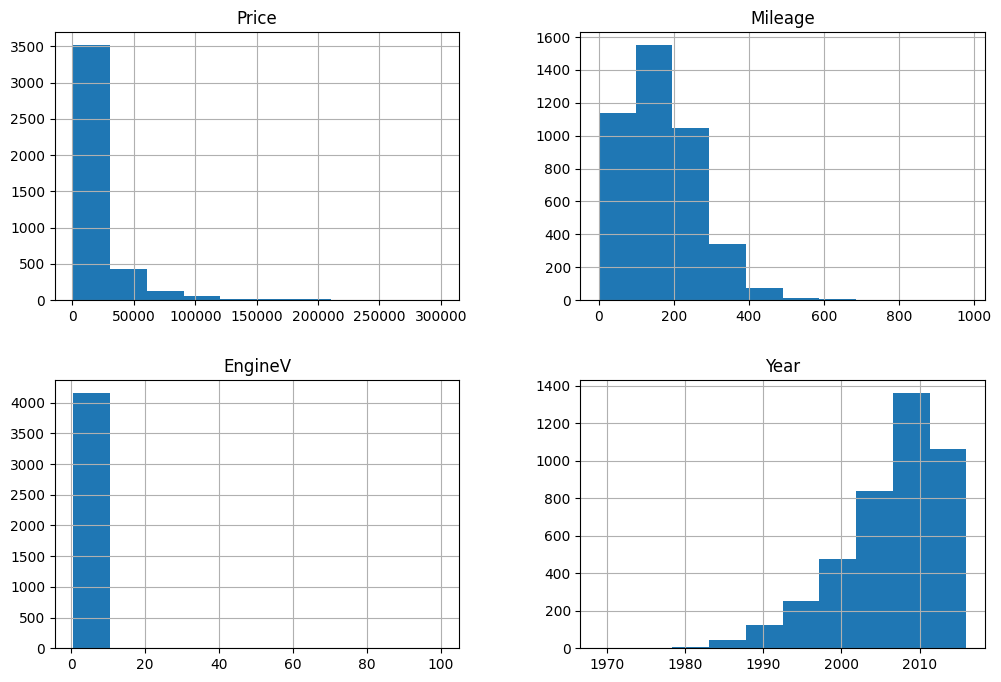

In [34]:
x.hist(figsize=(12,8))

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'EngineV'}>,
        <Axes: title={'center': 'Year'}>]], dtype=object)

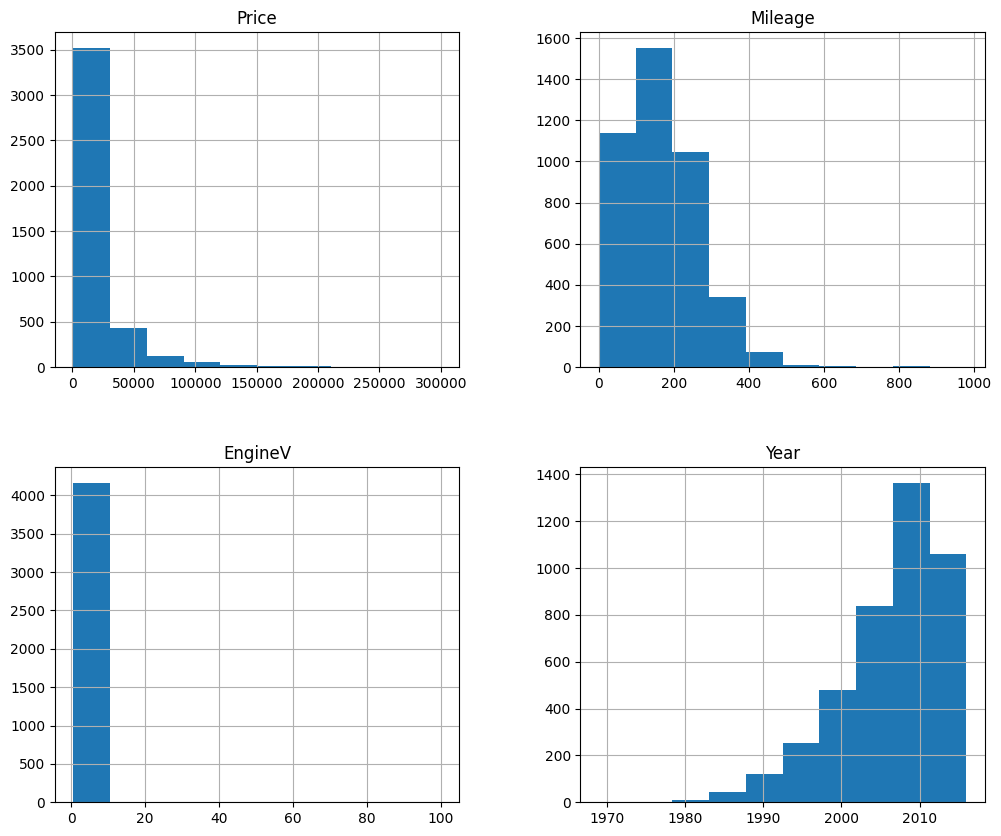

In [35]:
x.hist(figsize=(12,10))

In [36]:
x[x.EngineV>20]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
256,Mercedes-Benz,5500.0,sedan,100,99.99,Petrol,yes,2007,S 550
930,BMW,6800.0,crossover,242,99.99,Diesel,no,2005,X3
1189,BMW,25000.0,crossover,150,30.00,Petrol,yes,2007,X5
1203,BMW,3300.0,sedan,233,28.00,Petrol,no,1997,528
1264,BMW,3000.0,sedan,350,99.99,Other,yes,1992,520
1269,Renault,2750.0,hatch,186,22.00,Diesel,no,2005,Laguna
1311,Volkswagen,4800.0,sedan,190,99.99,Petrol,yes,1998,Passat B5
1431,Mercedes-Benz,6500.0,sedan,215,55.00,Petrol,no,2001,S 55
1905,Renault,7500.0,van,240,74.00,Diesel,yes,2005,Grand Scenic
2095,Renault,14999.0,van,54,66.00,Other,yes,2012,Kangoo


<ipython-input-37-b0136936871a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x.corr())


<Axes: >

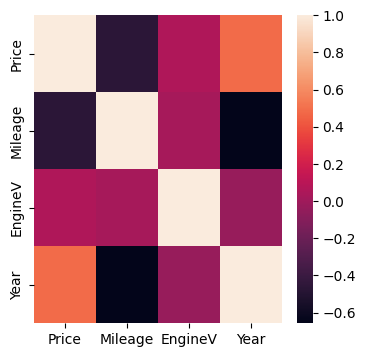

In [37]:
plt.figure(figsize=(4,4))
sns.heatmap(x.corr())

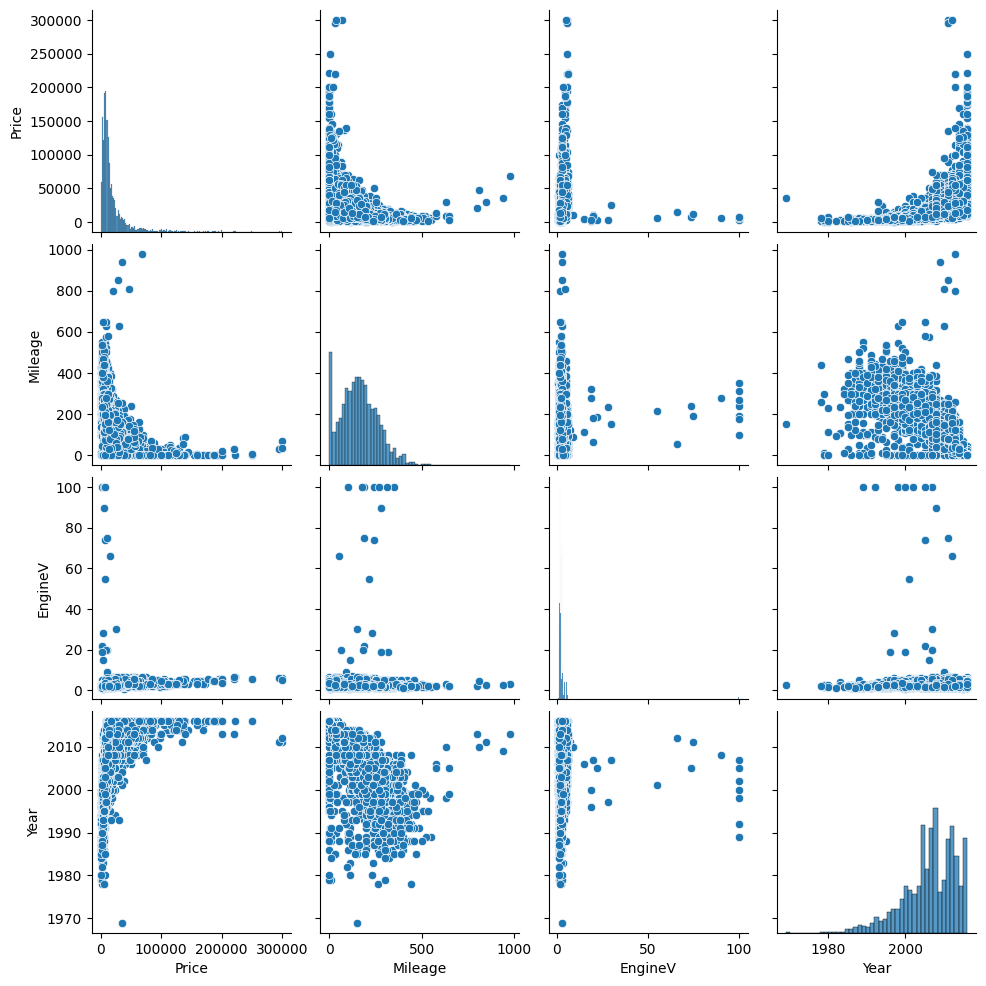

In [38]:
sns. pairplot(data=x)